In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import quad
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt


In [2]:
#let's define the variables
phi, b, n = smp.symbols('\phi, b, n')


In [3]:
#let's define the function
b_expression = n*smp.cot(phi/2)
b_expression

n*cot(\phi/2)

In [4]:
#let's defnine the eqation 
eq = smp.Eq(b, b_expression)

In [5]:
#let's invert the function, let's express phi with respect to b 
phi_expression = smp.solve(eq, phi)
phi_expression 

[2*acot(b/n)]

In [6]:
#let's define the derivative of b with respect to phi
db_dphi = smp.diff(b_expression, phi)
db_dphi

n*(-cot(\phi/2)**2/2 - 1/2)

In [7]:
#now let's define the pdf that b follows 
# b follows a normal distribution, with mean 0 and standard deviation sigma

pdf_b, sigma = smp.symbols('pdf(b), \sigma ')

#now lets define the expression of the pdf of b 
pdf_b_expression = (1/smp.sqrt(2*smp.pi*sigma**2))*smp.exp(-b_expression**2/(2*sigma**2))
pdf_b_expression

sqrt(2)*exp(-n**2*cot(\phi/2)**2/(2*\sigma**2))/(2*sqrt(pi)*sqrt(\sigma**2))

In [11]:
pdf_phi = pdf_b_expression*smp.Abs(db_dphi)
pdf_phi.simplify()


sqrt(2)*exp(-n**2*cot(\phi/2)**2/(2*\sigma**2))*Abs(n/(cos(\phi) - 1))/(2*sqrt(pi)*sqrt(\sigma**2))

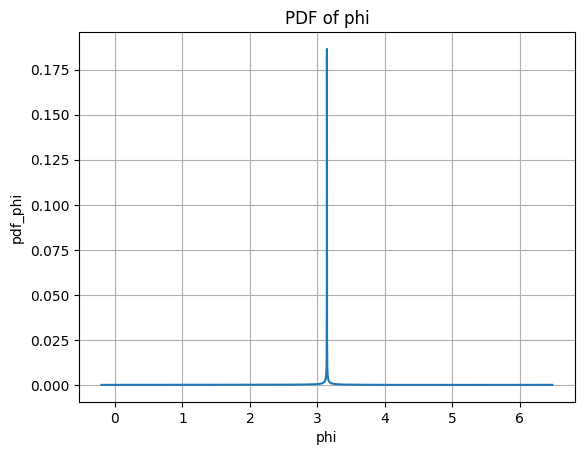

In [9]:
#lets graph the function first 
#we have to convert it into a np function 
# Convert the expression to a NumPy function
pdf_phi_func = smp.lambdify((phi, n, sigma), pdf_phi)

# Set the parameters
n = 2.25E-14  # Example value for a
sigma = 1.44E-10  # Example value for sigma

# Generate data points to graph
phi_values = np.linspace(0 - 0.2, 2*np.pi + 0.2, 10000)
pdf_phi_values = pdf_phi_func(phi_values, n, sigma)
#cot_f= np.cos(phi_values)/np.sin(phi_values)

# Plot the data
plt.plot(phi_values, pdf_phi_values)
plt.xlabel('phi')
plt.ylabel('pdf_phi')
plt.title('PDF of phi')
plt.grid(True)
plt.show()

In [10]:
#let's find the normalization constant within 0 and 2 pi
# Perform the integration over the interval [0, 2π]
I, error = quad(pdf_phi_func, 0, 2 * np.pi, args=(n, sigma))
print(f"I: {I}, error: {error}")

I: inf, error: nan


<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in exp
  return (1/2)*sqrt(2)*exp(-1/2*n**2*tan((1/2)*Dummy_39)**(-1.0)**2/Dummy_38**2)*abs(n*((1/2)*tan((1/2)*Dummy_39)**(-1.0)**2 + 1/2))/(sqrt(pi)*sqrt(Dummy_38**2))
/tmp/ipykernel_3768/2394809059.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I, error = quad(pdf_phi_func, 0, 2 * np.pi, args=(n, sigma))
